In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
import os
root_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if root_path not in sys.path:
    sys.path.append(root_path)
from fileDir import getDataDir, getModelDir, getPredDir
# TRAIN_PATH = getDataDir("train")
df = pd.read_csv("../../data/train_dataset.csv")
df.head()

,ID,pms_i_ymd,Area,Province,Shop Name,gender,date_of_birth_week,date_of_birth,marital_status,number_of_children,...,r_allloan_amount,r_additional_income,r_spouse_income,r_generalcode1,r_generalcode2,r_generalcode3,r_generalcode4,r_generalcode5,apply,default_12month
0,202412000001,2018/4/2,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,6,1971/5/18,1,2,...,0,0.0,0.0,NaN,NaN,2.0,4.0,4.0,WI,0
1,202412000002,2018/4/2,Bangkok Metropolitan Region,Bangkok,Silom Complex,M,4,1983/1/5,1,0,...,0,5000.0,0.0,NaN,NaN,1.0,4.0,4.0,WI,0
2,202412000003,2018/4/3,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,5,1992/11/19,1,0,...,10000,NaN,NaN,NaN,NaN,1.0,2.0,4.0,DS,0
3,202412000004,2018/4/4,Bangkok Metropolitan Region,Bangkok,Silom Complex,M,7,1990/11/3,1,2,...,0,0.0,0.0,NaN,NaN,1.0,4.0,4.0,WI,0
4,202412000005,2018/4/4,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,6,1994/12/16,3,1,...,0,0.0,0.0,NaN,NaN,1.0,4.0,4.0,DS,1


In [34]:
%matplotlib inline
import seaborn as sns
df.shape

(2781, 40)

In [4]:
if {'living_period_month','living_period_year'}.issubset(df.columns):
        df['living_period_year'] = (df['living_period_month'].fillna(0) + df['living_period_year'].fillna(0) * 12)/12
        df.drop(columns=['living_period_month'], inplace=True)

if {'c_number_of_working_month','c_number_of_working_year'}.issubset(df.columns):
        df['c_number_of_working_year'] = (df['c_number_of_working_month'].fillna(0) + df['c_number_of_working_year'].fillna(0) * 12)/12
        df.drop(columns=['c_number_of_working_month'], inplace=True)

    # Convert birth date to age
if 'date_of_birth' in df.columns:
        df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')
        df['age'] = 2025 - df['date_of_birth'].dt.year
        df.drop(columns=['date_of_birth'], inplace=True)

In [5]:
print(df.columns.tolist())

['ID', 'pms_i_ymd', 'Area', 'Province', 'Shop Name', 'gender', 'date_of_birth_week', 'marital_status', 'number_of_children', 'postal_code', 'tel_category', 'number_of_resident', 'living_period_year', 'type_of_residence', 'c_postal_code', 'c_business_type', 'c_number_of_employee', 'c_position', 'c_occupation', 'c_employment_status', 'c_monthly_salary', 'c_number_of_working_year', 'c_salary_payment_methods', 'c_date_of_salary_payment', 'media', 'place_for_sending_information', 'r_expected_credit_limit', 'r_propose', 'r_allloan_case', 'r_allloan_amount', 'r_additional_income', 'r_spouse_income', 'r_generalcode1', 'r_generalcode2', 'r_generalcode3', 'r_generalcode4', 'r_generalcode5', 'apply', 'default_12month', 'age']


In [29]:
print(df['r_generalcode5'].min(), df['r_generalcode5'].max())

0.0 7.0


In [31]:
row_numbers = df.index[df['r_generalcode5'] == 7.0].tolist()
print(row_numbers)

[17443, 29135]


In [6]:
num_cols = ['date_of_birth_week', 'marital_status', 'number_of_children', 'postal_code', 'tel_category'
,'number_of_resident', 'living_period_year', 'type_of_residence', 'c_postal_code', 'c_business_type', 'c_number_of_employee'
,'c_position', 'c_occupation', 'c_employment_status', 'c_monthly_salary', 'c_number_of_working_year'
,'c_salary_payment_methods', 'c_date_of_salary_payment', 'media', 'place_for_sending_information', 'r_expected_credit_limit'
,'r_propose', 'r_allloan_case', 'r_allloan_amount', 'r_additional_income', 'r_spouse_income', 'r_generalcode1'
,'r_generalcode2', 'r_generalcode3', 'r_generalcode4', 'r_generalcode5']
for c in num_cols:
    print(df[c].max(), df[c].min())

7 1
5 1
20 0
96220 1054
3 1
74 0
60.0 0.0
7 1
93170.0 27.0
17 1
9999 0
5 1
55 12
5 1
210000 5000
40.0 0.08333333333333333
3 1
36.0 0.0
12 1
2 1
1500000.0 0.0
6.0 1.0
2110000.0 0.0
1200000 0
1000000.0 0.0
700000.0 0.0
4.0 0.0
9.0 0.0
4.0 0.0
9.0 0.0
7.0 0.0


In [24]:
num_cols = ['r_allloan_case', 'r_allloan_amount', 'r_additional_income', 'r_spouse_income', 'r_generalcode1'
,'r_generalcode2', 'r_generalcode3', 'r_generalcode4', 'r_generalcode5']
for c in num_cols:
    print(df[c].max(), df[c].min())

2110000.0 0.0
1200000 0
1000000.0 0.0
700000.0 0.0
4.0 0.0
9.0 0.0
4.0 0.0
9.0 0.0
7.0 0.0


In [35]:
df = df[df['r_generalcode1'] > 2]

In [36]:
df.loc[df['r_generalcode1'] == 2] = 0
df.loc[df['r_generalcode1'] == 1] = 1
df['all_income'] = df['c_monthly_salary'] + (df['r_generalcode1']*df['r_spouse_income'])

In [41]:
print(df['r_generalcode1'].min())

nan


In [39]:
print(df.columns.tolist())

['ID', 'pms_i_ymd', 'Area', 'Province', 'Shop Name', 'gender', 'date_of_birth_week', 'marital_status', 'number_of_children', 'postal_code', 'tel_category', 'number_of_resident', 'living_period_year', 'type_of_residence', 'c_postal_code', 'c_business_type', 'c_number_of_employee', 'c_position', 'c_occupation', 'c_employment_status', 'c_monthly_salary', 'c_number_of_working_year', 'c_salary_payment_methods', 'c_date_of_salary_payment', 'media', 'place_for_sending_information', 'r_expected_credit_limit', 'r_propose', 'r_allloan_case', 'r_allloan_amount', 'r_additional_income', 'r_spouse_income', 'r_generalcode1', 'r_generalcode2', 'r_generalcode3', 'r_generalcode4', 'r_generalcode5', 'apply', 'default_12month', 'age', 'all_income']


In [53]:
df.isnull().sum()

ID                                   0
pms_i_ymd                            0
Area                                 0
Province                             0
Shop Name                            0
gender                               0
date_of_birth_week                   0
date_of_birth                        0
marital_status                       0
number_of_children                   0
postal_code                          0
tel_category                         0
number_of_resident                   0
living_period_year                   0
living_period_month                  0
type_of_residence                    0
c_postal_code                        1
c_business_type                      0
c_number_of_employee                 0
c_position                           0
c_occupation                         0
c_employment_status                  0
c_monthly_salary                     0
c_number_of_working_year             0
c_number_of_working_month            0
c_salary_payment_methods 

In [10]:
if 'date_of_birth' in df.columns:
        df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')
        df['age'] = 2025 - df['date_of_birth'].dt.year
        df.drop(columns=['date_of_birth'], inplace=True)

<Axes: xlabel='default_12month', ylabel='c_monthly_salary'>

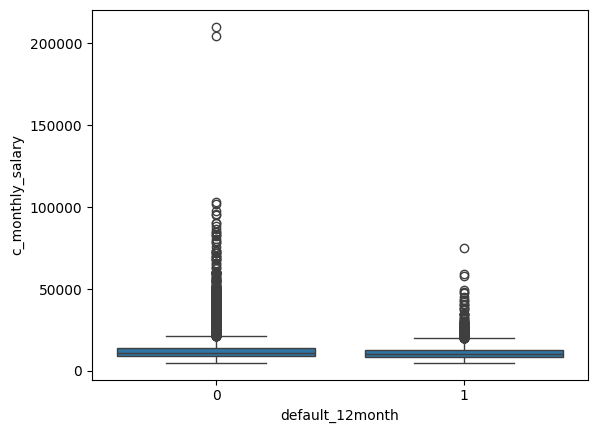

In [29]:
sns.boxplot(x=df.default_12month, y=df['c_monthly_salary'])

In [30]:
col = 'c_monthly_salary'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

<Axes: xlabel='default_12month', ylabel='c_monthly_salary'>

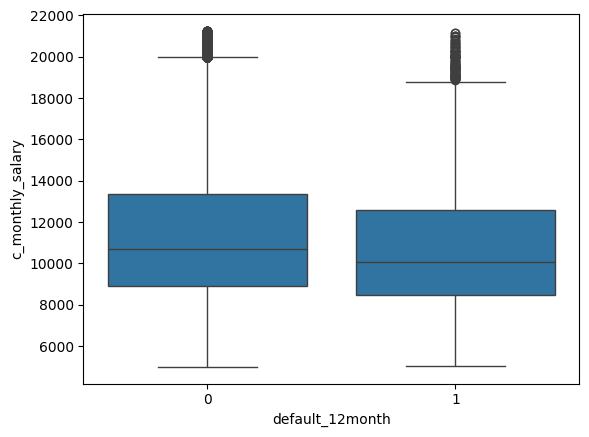

In [31]:
sns.boxplot(x=df.default_12month, y=df_no_outliers['c_monthly_salary'])

<Axes: xlabel='default_12month', ylabel='r_allloan_case'>

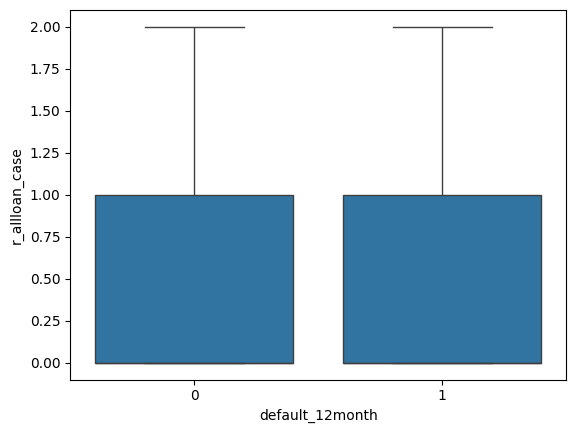

In [32]:
sns.boxplot(x=df.default_12month, y=df_no_outliers['r_allloan_case'])

<Axes: xlabel='default_12month', ylabel='count'>

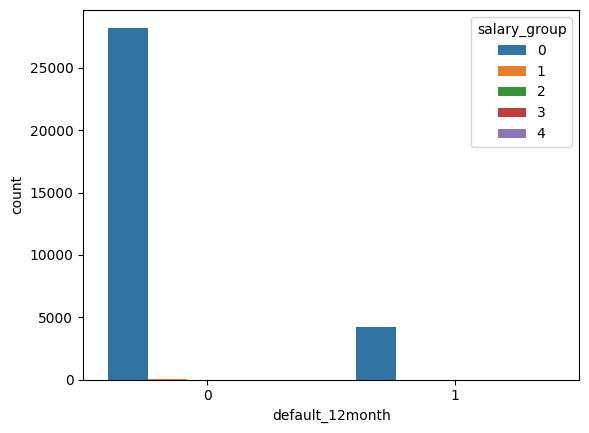

In [13]:
%matplotlib inline
import seaborn as sns

sns.countplot(x=df.default_12month, hue=df["salary_group"])

<Axes: xlabel='default_12month', ylabel='number_of_children'>

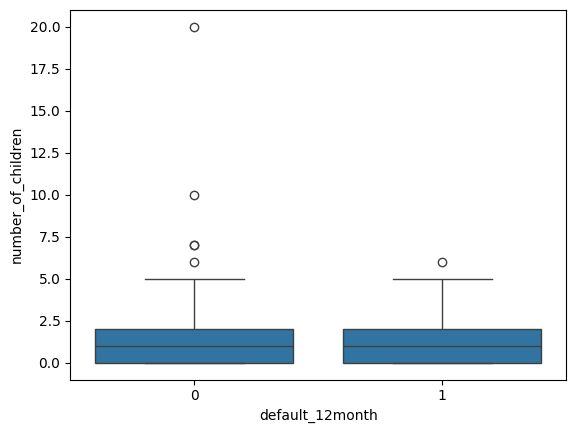

In [37]:
sns.boxplot(x=df.default_12month, y=df['number_of_children'])

In [ ]:
print(df['c_monthly_salary'].min())
print(df['c_monthly_salary'].max())
print(df['c_monthly_salary'].mean())
print(df['c_monthly_salary'].median())
Q1 = df['c_monthly_salary'].quantile(0.25)
Q3 = df['c_monthly_salary'].quantile(0.75)
print(Q3)

5000
210000
12228.040831386053
10850.0
8964.0
13881.0


In [36]:
bins = [0, 8000, 14000, 210000]   # intervals: (0–10000], (10000–20000], (20000–30000]
labels = [1, 2, 3]                # labels for each range

# Apply the binning
df['c_monthly_salary_group'] = pd.cut(df['c_monthly_salary'], bins=bins, labels=labels, include_lowest=True)

In [37]:
print(df['c_monthly_salary_group'].head())

0    2
1    2
2    2
3    2
4    1
Name: c_monthly_salary_group, dtype: category
Categories (3, int64): [1 < 2 < 3]


<Axes: xlabel='default_12month', ylabel='count'>

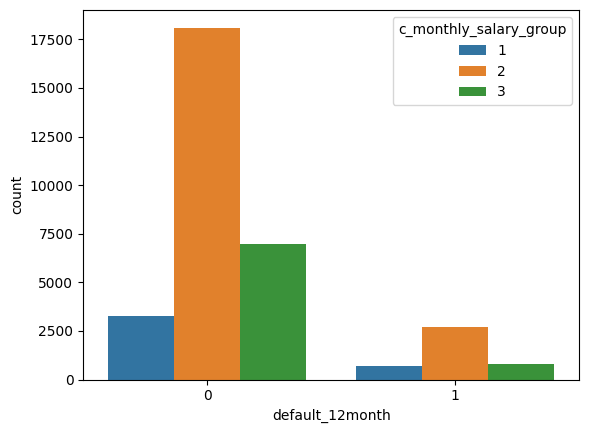

In [40]:
sns.countplot(x=df.default_12month, hue=df['c_monthly_salary_group'])

In [47]:
num_cols = ['r_spouse_income', 'c_monthly_salary', 'r_additional_income']
for c in num_cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')
num_cols = [c for c in num_cols if c in df.columns]
df[num_cols] = df[num_cols].fillna(0)

<Axes: xlabel='default_12month', ylabel='all_income'>

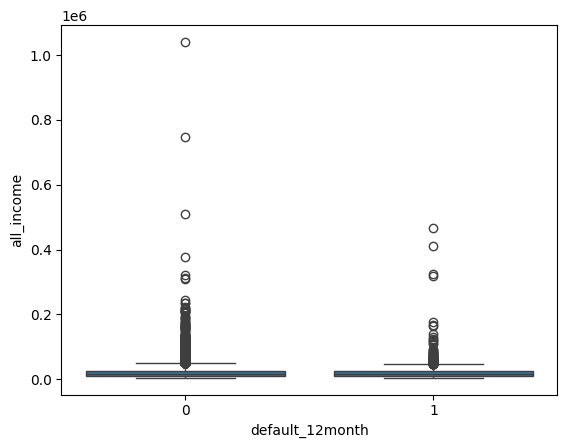

In [48]:
df['all_income'] = df['r_spouse_income'].fillna(0) + df['c_monthly_salary'].fillna(0) + df['r_additional_income'].fillna(0)
sns.boxplot(x=df.default_12month, y=df['all_income'])

In [45]:
print(df['all_income'].max())
print(df['all_income'].min())
print(df['all_income'].mean())
print(df['all_income'].median())

1040200.0
5000.0
20913.69474849342
17050.0


In [43]:
col = 'all_income'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

<Axes: xlabel='default_12month', ylabel='all_income'>

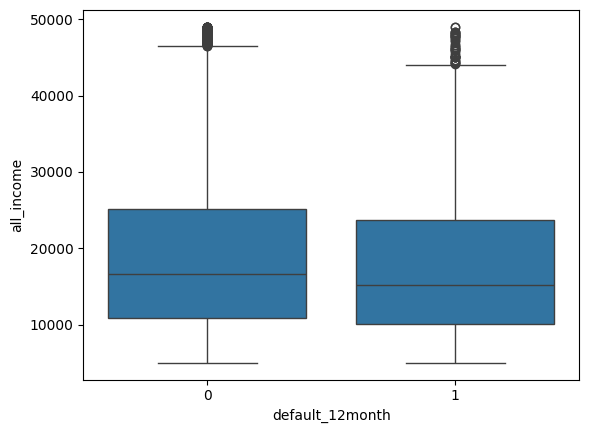

In [44]:
sns.boxplot(x=df.default_12month, y=df_no_outliers['all_income'])